In [9]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


print("First few rows of the dataset:")
# Load the dataset
data_path = 'check/gym_members_exercise_tracking.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(df.head())

First few rows of the dataset:
First few rows of the dataset:


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000



Missing Values:


Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


Duplicate Rows: 0


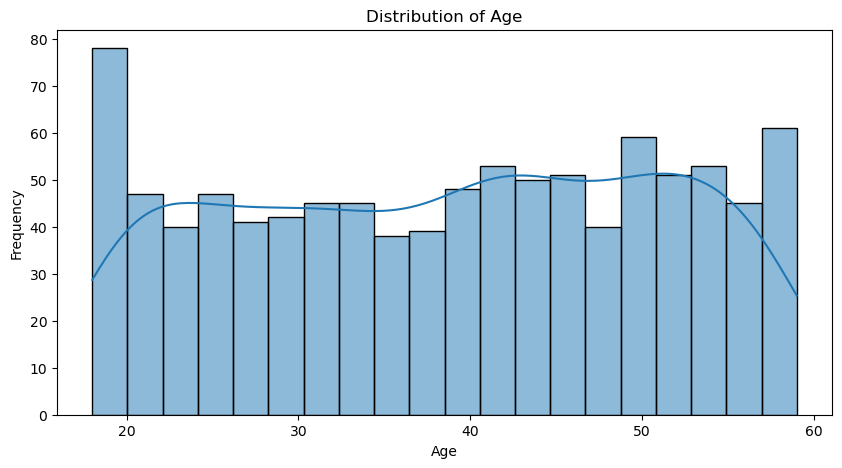

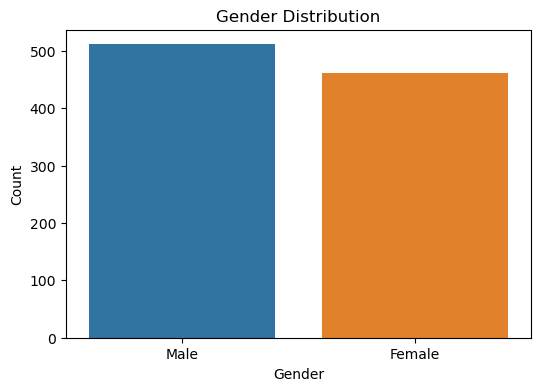

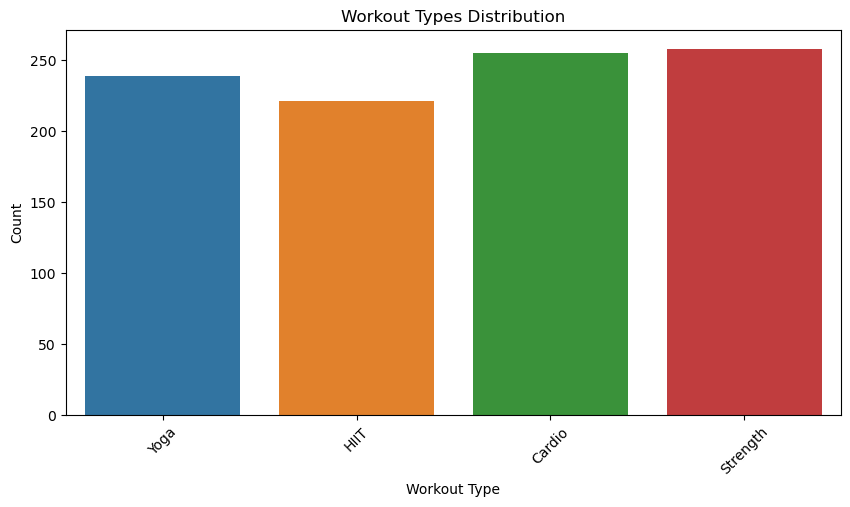

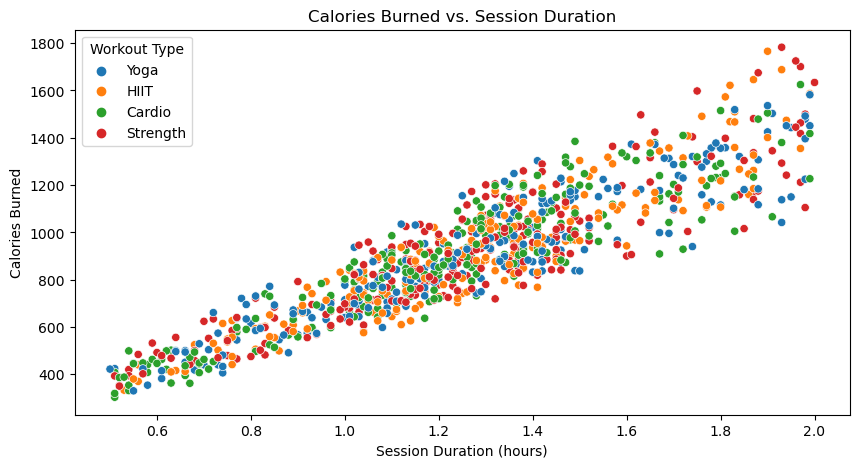

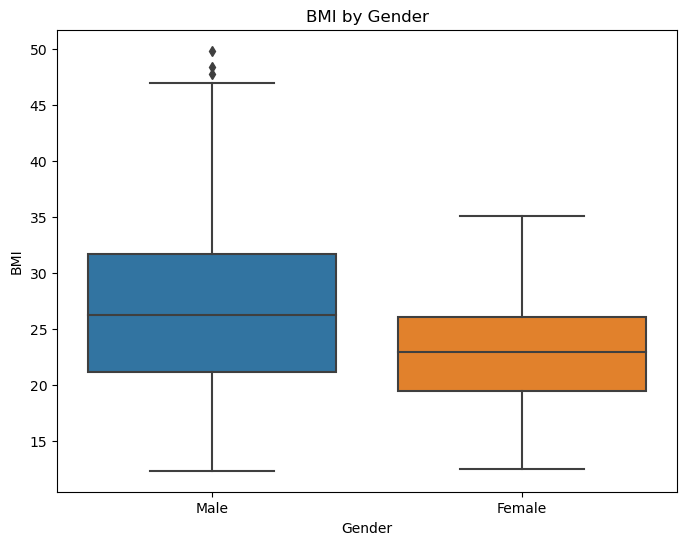

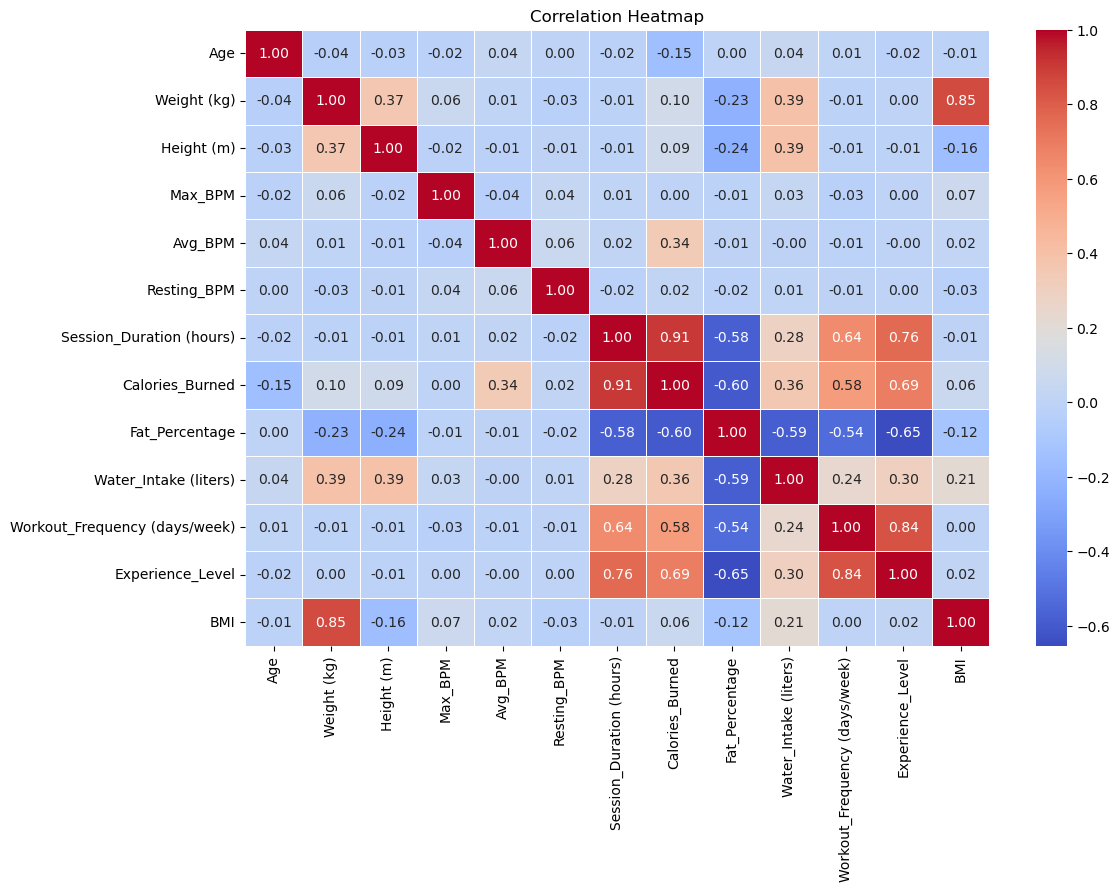

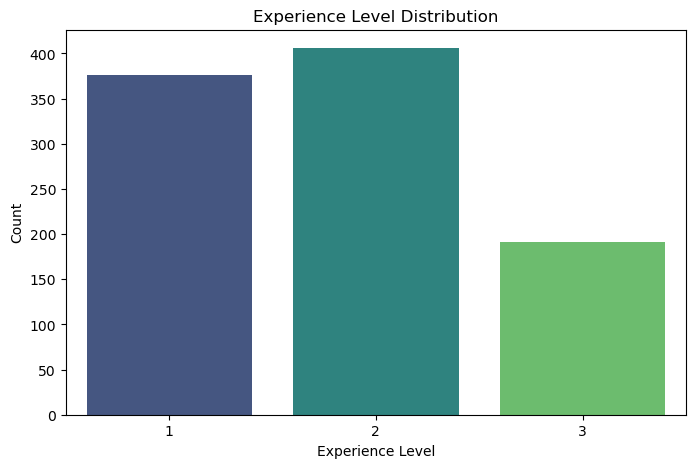

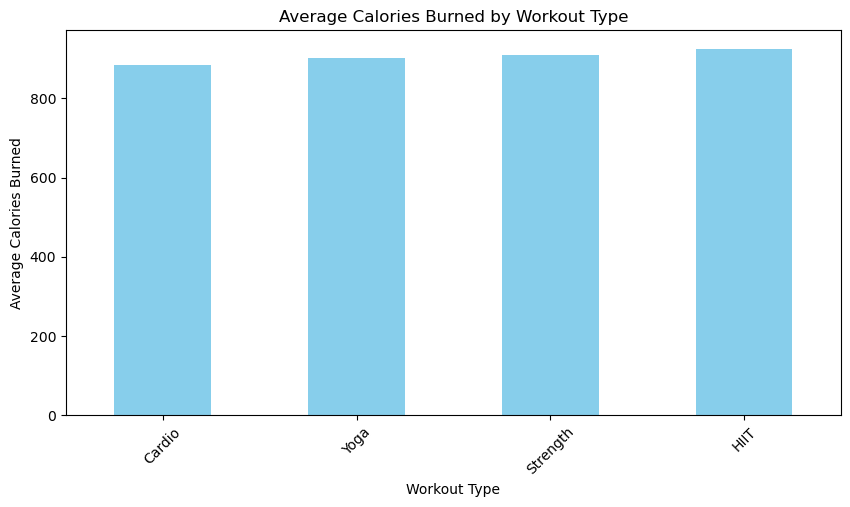

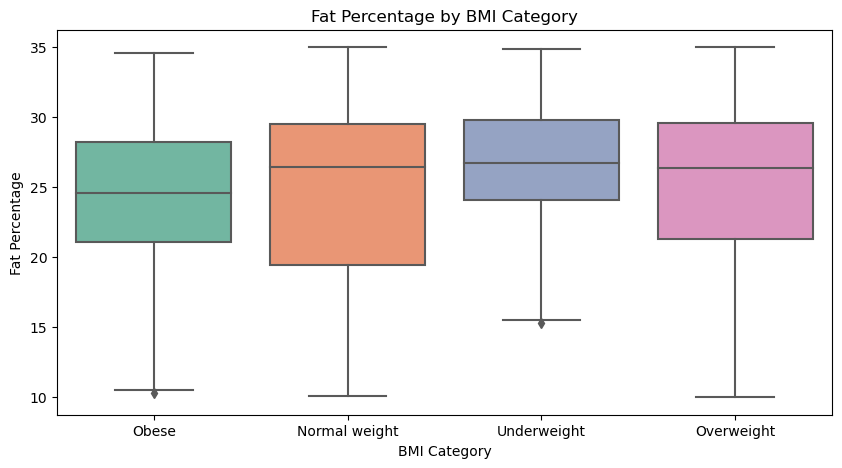

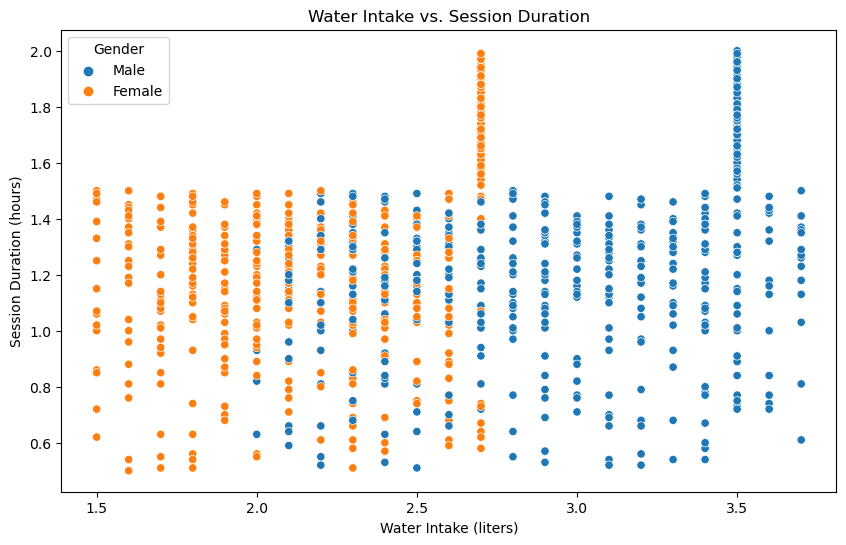


--- Insights and Summary ---
1. The average calories burned varies significantly by workout type, with HIIT and Cardio generally resulting in higher calorie burn.
2. There is a positive correlation between Session Duration and Calories Burned, as expected.
3. Gender distribution shows a fairly balanced dataset.
4. BMI Categories reveal most members fall within the Normal weight and Overweight categories.
5. Heart rate variables like Max_BPM, Avg_BPM, and Resting_BPM show interesting variations across experience levels and workout types.


In [10]:


# Display basic information about the dataset
print("\nDataset Information:")
df.info()

# Display summary statistics for numeric columns
print("\nSummary Statistics:")
display(df.describe())

# Check for missing values
print("\nMissing Values:")
display(df.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows:", df.duplicated().sum())

# Feature Engineering: Adding BMI Category based on BMI values
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 24.9:
        return "Normal weight"
    elif 25 <= bmi < 29.9:
        return "Overweight"
    else:
        return "Obese"

df['BMI_Category'] = df['BMI'].apply(bmi_category)

# Distribution of Age
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Distribution of Workout Types
plt.figure(figsize=(10, 5))
sns.countplot(x='Workout_Type', data=df)
plt.title('Workout Types Distribution')
plt.xlabel('Workout Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Relationship between Calories Burned and Session Duration
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Session_Duration (hours)', y='Calories_Burned', hue='Workout_Type', data=df)
plt.title('Calories Burned vs. Session Duration')
plt.xlabel('Session Duration (hours)')
plt.ylabel('Calories Burned')
plt.legend(title='Workout Type')
plt.show()

# Box Plot for BMI by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='BMI', data=df)
plt.title('BMI by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Distribution of Experience Levels
plt.figure(figsize=(8, 5))
sns.countplot(x='Experience_Level', data=df, palette="viridis")
plt.title('Experience Level Distribution')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.show()

# Average Calories Burned by Workout Type
avg_calories = df.groupby('Workout_Type')['Calories_Burned'].mean().sort_values()
plt.figure(figsize=(10, 5))
avg_calories.plot(kind='bar', color='skyblue')
plt.title('Average Calories Burned by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Average Calories Burned')
plt.xticks(rotation=45)
plt.show()

# Boxplot of Fat Percentage by BMI Category
plt.figure(figsize=(10, 5))
sns.boxplot(x='BMI_Category', y='Fat_Percentage', data=df, palette="Set2")
plt.title('Fat Percentage by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Fat Percentage')
plt.show()

# Water Intake vs Session Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Water_Intake (liters)', y='Session_Duration (hours)', hue='Gender', data=df)
plt.title('Water Intake vs. Session Duration')
plt.xlabel('Water Intake (liters)')
plt.ylabel('Session Duration (hours)')
plt.legend(title='Gender')
plt.show()

# Insights and Summary
print("\n--- Insights and Summary ---")
print("1. The average calories burned varies significantly by workout type, with HIIT and Cardio generally resulting in higher calorie burn.")
print("2. There is a positive correlation between Session Duration and Calories Burned, as expected.")
print("3. Gender distribution shows a fairly balanced dataset.")
print("4. BMI Categories reveal most members fall within the Normal weight and Overweight categories.")
print("5. Heart rate variables like Max_BPM, Avg_BPM, and Resting_BPM show interesting variations across experience levels and workout types.")
